In [27]:
import matplotlib.pyplot as plt
import math

### Converting an  $N^\text{th}$ Order ODE to System of First Order ODEs

Let us consider the following $N^\text{th}$ order ODE:

$$
a_n {d^nx\over dt^n} + a_{n-1} {d^{n-1}x\over dt^{n-1}} + \cdots + a_1 {dx\over dt} = f(x, t)
$$

For the ease of notation, consider $y_0 = x$, $y_1 = \displaystyle{dx\over dt}$, $y_2 = \displaystyle{d^2x\over dt^2}$, $\cdots$, $y_{n-1} = \displaystyle{d^{n-1}x\over dt^{n-1}}$, $y_{n} = \displaystyle{d^nx\over dt^n}$, we can rewrite the above equation as:

$$
\begin{align*}
a_n y_n + a_{n-1} y_{n-1} + \cdots + a_1 y_1 &= f(y_0, t)
\end{align*}
$$

Now, we can write the above equation as a system of first order ODEs as follows:

$$
{dy_0\over dt} = y_1\\
{dy_1\over dt} = y_2\\
{dy_2\over dt} = y_3\\
\vdots\\
{dy_{n-1}\over dt} = y_n\\
$$

and the original equation becomes:

$$
\begin{align*}
y_n = {1\over a_n} \left(f(y_0,t) - \sum_{i=1}^{n-1} a_i y_i\right)
\end{align*}
$$

Considering the vector $\mathbf y$ as 

$$
\begin{align*}
\mathbf y &= \begin{bmatrix} y_0& y_1& \cdots& y_{n-1}\end{bmatrix}^T\\
\implies {d \mathbf y \over dt} &= \begin{bmatrix} \displaystyle{d y_0\over dt} & \displaystyle{d y_1\over dt} & \cdots & \displaystyle{d y_{n-1}\over dt}\end{bmatrix}^T\\
\implies {d \mathbf y \over dt} &= \begin{bmatrix} y_1 & y_2 & \cdots & y_n\end{bmatrix}^T\\
\implies {d \mathbf y \over dt} &= \begin{bmatrix} y_1 & y_2 & \cdots & y_{n-1} & \displaystyle{1\over a_n} \left(f(y_0,t) - \sum_{i=1}^{n-1} a_i y_i\right)\end{bmatrix}^T\\
\end{align*}
$$

In the last step, we replaced $y_n$ with the expression we derived above. Thus, we can write the system of first order ODEs as:

$$
{d \mathbf y \over dt} = g(\mathbf y, t)
$$

where $g(\mathbf y, t)$ is a vector function of $\mathbf y$ and $t$ which we can write as:

$$
g(\mathbf y, t) = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{n-1} \\ \displaystyle{1\over a_n} \left(f(y_0,t) - \sum_{i=1}^{n-1} a_i y_i\right)\end{bmatrix}\\
$$

In [28]:
## Input to the Variables

n = 2 # order
A = [2, 1] # coefficients (a_1, a_2, ... , a_n)

f = "-x + math.sin(t)" # Function

delta_t = 0.1 # Delta
initial_conditions = [1, 1] # initial conditions
trange = [0, 10] # t - Range

In [29]:
def scalarVectorProduct(scalar, vector):
    """
    Description
    -----------
    This function multiplies a scalar with a vector.

    Parameters
    ----------
    scalar : float
        Scalar.
    vector : list
        List of numbers.
    """

    output = []
    for i in range(len(vector)):
        output.append(scalar * vector[i])

    return output

In [30]:
def addTwoVectors(vector1, vector2):
    """
    Description
    -----------
    This function adds two vectors.

    Parameters
    ----------
    vector1 : list
        List of numbers.
    vector2 : list
        List of numbers.
    """

    output = []
    for i in range(len(vector1)):
        output.append(vector1[i] + vector2[i])

    return output

In [31]:
def dotProduct(vector1, vector2):
    """
    Description
    -----------
    This function calculates the dot product of two vectors.

    Parameters
    ----------
    vector1 : list
        List of numbers.
    vector2 : list
        List of numbers.
    """

    output = 0
    for i in range(len(vector1)):
        output += vector1[i] * vector2[i]

    return output


In [32]:
def g(y, t, f, ode_coefficients, order):
    """
    Description
    -----------
    This is the vector function we defined above

    Parameters
    ----------
    y : list
        List of values of all the derivatives of x at some t. [y_0, y_1, y_2, ... , y_{n-1}]
    t : float
        t.
    f : string
        Function f(x,t) in the original ODE.
    ode_coefficients : list
        List of coefficients of the ODE. (a_1, a_2, ... , a_n)
    order : int
        Order of the ODE.
    """

    output = []
    for i in range(order - 1):
        output.append(y[i+1]) # output[i] = y[i+1] forall i in [0, order - 2]

    dummy = f(y[0], t) 
    dummy -= dotProduct(ode_coefficients[:-1], y[1:]) # dummy = f(x, t) - sum_{i = 1}^{n} a_i * y_i
    dummy /= ode_coefficients[-1] # dummy = (f(x, t) - sum_{i = 1}^{n} a_i * y_i) / a_n

    output.append(dummy) # output[order - 1] = dummy
    return output

### The Forward Euler Algorithm

The Forward Euler Algorithm is a method to approximate the solution of Ordinary Differential Equation using numerical methods. It makes a first order Taylor series approximation of the solution at the next time step. The Taylor series approximation is given by:

$$
\begin{align*}
\mathbf y(t + \Delta t) &= \mathbf y(t) + \Delta t {d \mathbf y(t) \over dt}\\
\end{align*}
$$

where $\Delta t$ is the step size and $t$ is the time. As we have derived above, for any ODE $\displaystyle {d \mathbf y(t) \over dt}$ is given by $g(\mathbf y, t)$, thus we can write the above equation as:

$$
\begin{align*}
\mathbf y(t + \Delta t) &= \mathbf y(t) + \Delta t g(\mathbf y, t)\\
\end{align*}
$$

According to the original ODE, x(t) is the solution of the ODE, thus, we need only the value of $y_0$ at each time step. 

In [33]:
def forwardEulerAlgorithm(order, ode_coefficients, f_x_t, delta_t, initial_conditions, trange):
    """
    Description
    -----------
    This function implements the forward Euler algorithm.

    Parameters
    ----------
    order : int
        Order of the ODE.
    ode_coefficients : list
        List of coefficients of the ODE. (a_1, a_2, ... , a_n)
    f_x_t : str
        Function of x and t. 
    delta_t : float
        Delta t.
    initial_conditions : list
        List of initial conditions values of all the derivatives of x at some t i.e. [y_0, y_1, ..., y_n-1] at some t = t_0
    trange : tuple
        Tuple of t's range. (t_0, t_f)
    """

    f = lambda x, t :eval(f_x_t) # Function

    x_coordinates = []
    t_coordinates = []

    x = initial_conditions
    t = trange[0]

    while t <= trange[1]:
        x_coordinates.append(x[0])
        t_coordinates.append(t)
        
        # x = x + delta_t * g(x, t)
        x = addTwoVectors(x, scalarVectorProduct(delta_t, g(x, t, f, ode_coefficients, order))) 
        t += delta_t
    
    return x_coordinates, t_coordinates

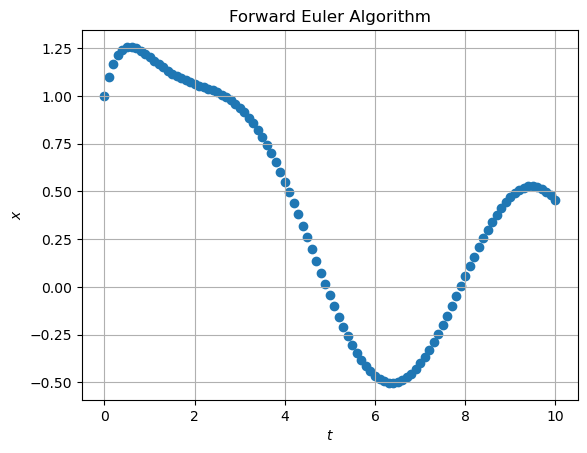

In [34]:
x_coord, t_coord = forwardEulerAlgorithm(n, A, f, delta_t, initial_conditions, trange)
plt.scatter(t_coord, x_coord)
plt.title("Forward Euler Algorithm")
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.grid(True)
plt.show()

### Runge-Kutta 2 Method

Runge-Kutta 2 Algorithm is an extension of the Forward Euler Algorithm. It makes a second order approximation as 

$$
\begin{align*}
k_1 &= g(\mathbf y, t)\\
k_2 &= g(\mathbf y + \Delta t k_1, t + \Delta t)\\
\end{align*}
$$

and the update equation is given by:

$$
\begin{align*}
\mathbf y(t + \Delta t) &= \mathbf y(t) + \Delta t \left({\mathbf k_1 + \mathbf k_2 \over 2}\right)\\
\end{align*}
$$

In [35]:
def rungeKuttaTwo(order, ode_coefficients, f_x_t, delta_t, initial_conditions, trange):
    """
    Description
    -----------
    This function implements the Runge-Kutta 2 algorithm.
    
    Parameters
    ----------
    order : int
        Order of the ODE.
    ode_coefficients : list
        List of coefficients of the ODE. (a_1, a_2, ... , a_n)
    f_x_t : str
        Function of x and t. 
    delta_t : float
        Delta t.
    initial_conditions : list
        List of initial conditions values of all the derivatives of x at some t i.e. [y_0, y_1, ..., y_n-1] at some t = t_0
    trange : tuple
        Tuple of t's range. (t_0, t_f)
    """

    f = lambda x, t :eval(f_x_t) # Function
    
    x_coordinates = []
    t_coordinates = []

    x = initial_conditions
    t = trange[0]

    while t <= trange[1]:
        x_coordinates.append(x[0])
        t_coordinates.append(t)

        k1 = g(x, t, f, ode_coefficients, order) # k1 = g(x, t)
        k2 = g(addTwoVectors(x, scalarVectorProduct(delta_t, k1)), t + delta_t, f, ode_coefficients, order) # k2 = g(x + delta_t * k1, t + delta_t)
        x = addTwoVectors(x, scalarVectorProduct(delta_t/2, addTwoVectors(k1, k2))) # x = x + delta_t/2 * (k1 + k2)
        t += delta_t
    
    return x_coordinates, t_coordinates

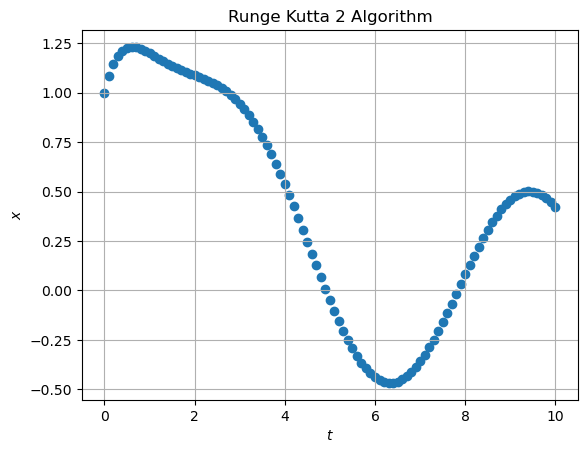

In [36]:
x_coord, t_coord = rungeKuttaTwo(n, A, f, delta_t, initial_conditions, trange)
plt.scatter(t_coord, x_coord)
plt.title("Runge Kutta 2 Algorithm")
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.grid(True)
plt.show()

### Runge-Kutta 4 Method

Runge-Kutta 4 Algorithm is an extension of Runge-Kutta 2. It makes a fourth order approximation as 

$$
\begin{align*}
\mathbf k_1 &= g(\mathbf y, t)\\
\mathbf k_2 &= g\left(\mathbf y + {\Delta t\over 2} \mathbf k_1, t + {\Delta t \over 2}\right)\\
\mathbf k_3 &= g\left(\mathbf y + {\Delta t\over 2} \mathbf k_2, t + {\Delta t \over 2}\right)\\
\mathbf k_4 &= g\left(\mathbf y + \Delta t \mathbf k_3, t + \Delta t\right)\\
\end{align*}
$$

and the update equation is given by:

$$
\begin{align*}
\mathbf y(t + \Delta t) &= \mathbf y(t) + {\Delta t \over 6} \left({\mathbf k_1 + 2\mathbf k_2 + 2\mathbf k_3 + \mathbf k_4}\right)\\
\end{align*}
$$

In [37]:
def rungeKuttaFour(order, ode_coefficients, f_x_t, delta_t, initial_conditions, trange):
    """
    Description
    -----------
    This function implements the Runge-Kutta 4 algorithm.

    Parameters
    ----------
    order : int
        Order of the ODE.
    ode_coefficients : list
        List of coefficients of the ODE. (a_n, a_n-1, ..., a_1)
    f_x_t : str
        Function of x and t. 
    delta_t : float
        Delta t.
    initial_conditions : list
        List of initial conditions values of all the derivatives of x at some t i.e. [y_0, y_1, ..., y_n-1] at some t = t_0
    trange : tuple
        Tuple of t's range. (t_0, t_f)
    """

    f = lambda x, t :eval(f_x_t) # Function
    
    x_coordinates = []
    t_coordinates = []

    x = initial_conditions
    t = trange[0]

    while t <= trange[1]:
        x_coordinates.append(x[0])
        t_coordinates.append(t)

        k1 = g(x, t, f, ode_coefficients, order) # k1 = g(x, t)
        k2 = g(addTwoVectors(x, scalarVectorProduct(delta_t/2, k1)), t + delta_t/2, f, ode_coefficients, order) # k2 = g(x + delta_t/2 * k1, t + delta_t/2)
        k3 = g(addTwoVectors(x, scalarVectorProduct(delta_t/2, k2)), t + delta_t/2, f, ode_coefficients, order) # k3 = g(x + delta_t/2 * k2, t + delta_t/2)
        k4 = g(addTwoVectors(x, scalarVectorProduct(delta_t, k3)), t + delta_t, f, ode_coefficients, order) # k4 = g(x + delta_t * k3, t + delta_t

        cache = addTwoVectors(k2, k3) # cache = k2 + k3
        cache = scalarVectorProduct(2, cache) # cache = 2 * (k2 + k3)
        cache = addTwoVectors(k1, cache) # cache = k1 + 2 * (k2 + k3)
        cache = addTwoVectors(cache, k4) # cache = k1 + 2 * (k2 + k3) + k4
        cache = scalarVectorProduct(delta_t/6, cache) # cache = delta_t/6 * (k1 + 2 * (k2 + k3) + k4)
        
        x = addTwoVectors(x, cache) # x = x + delta_t/6 * (k1 + 2 * (k2 + k3) + k4)
        t += delta_t
    
    return x_coordinates, t_coordinates

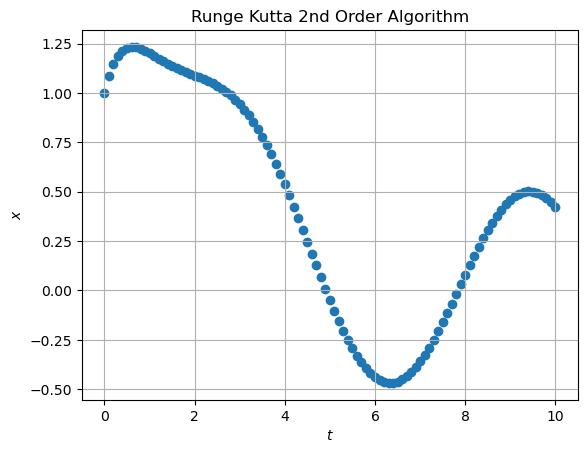

In [38]:
x_coord, t_coord = rungeKuttaFour(n, A, f, delta_t, initial_conditions, trange)
plt.scatter(t_coord, x_coord)
plt.title("Runge Kutta 2nd Order Algorithm")
plt.xlabel(r"$t$")
plt.ylabel(r"$x$")
plt.grid(True)
plt.show()

### Comparision Between Algorithms and Error Analysis

For the given example i.e. 

$$
{d^2x \over dt^2} + 2{dx \over dt} = -x + \sin(t)
$$

with initial condition $x(0) = 0$ and $x'(0) = $, we can solve the ODE analytically as:

$$
x(t) = {(5t + 3)\exp(-t) - \cos(t) \over 2}
$$

Finding the deviation of the numerical solution from the analytical solution

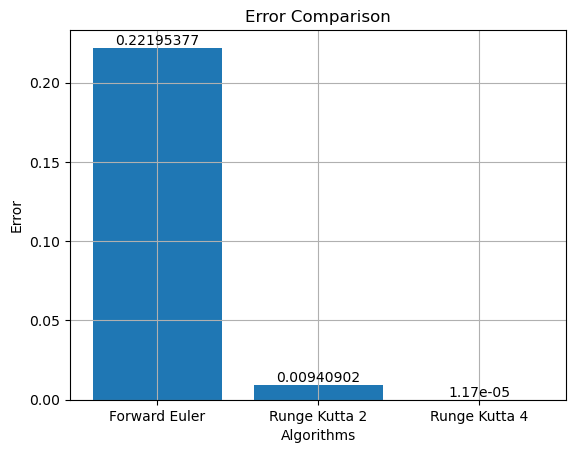

In [39]:
import numpy as np

x_coord_euler, t_coord = forwardEulerAlgorithm(n, A, f, delta_t, initial_conditions, trange)
x_coord_runge2, t_coord = rungeKuttaTwo(n, A, f, delta_t, initial_conditions, trange)
x_coord_runge4, t_coord = rungeKuttaFour(n, A, f, delta_t, initial_conditions, trange)

t_coord = np.array(t_coord)
x_original = (np.exp(-t_coord)*(5*t_coord + 3) - np.cos(t_coord))/2

# Considering the output as a single vector and finding the norm
errors = []
errors.append(np.linalg.norm(np.array(x_coord_euler) - x_original)) 
errors.append(np.linalg.norm(np.array(x_coord_runge2) - x_original)) 
errors.append(np.linalg.norm(np.array(x_coord_runge4) - x_original)) 

plt.bar(["Forward Euler", "Runge Kutta 2", "Runge Kutta 4"], errors)
for i in range(len(errors)):
    plt.text(i, errors[i], str(round(errors[i], 8)), ha = "center", va = "bottom")
plt.title("Error Comparison")
plt.xlabel("Algorithms")
plt.ylabel("Error")
plt.grid(True)
plt.show()